In [1]:
'''Introduction:
    Bengaluru city has thousands of restaurants, pubs, bars, cafe etc spawning across the city. These restaurants consists of variety of foods from across the continent.
    Even with these many options the saturation was still nowhere at the horizon, even then opening new restaurants was taxing and these new restaurants were not able to compete with the 
    existing ones in the city.'''

'Introduction:\n    Bengaluru city has thousands of restaurants, pubs, bars, cafe etc spawning across the city. These restaurants consists of variety of foods from across the continent.\n    Even with these many options the saturation was still nowhere at the horizon, even then opening new restaurants was taxing and these new restaurants were not able to compete with the \n    existing ones in the city.'

In [2]:
'''
Problem Statement:
1. Even with such a large demographic to work with why are new restaurants failing to gain popularity?
2. Does theme or type of food matter for a particular locality?
3. Do similiar themed restaurants have different revenue in different localities?
4. How does a particular sect affect restaurant revenue?

'''

'\nProblem Statement:\n1. Even with such a large demographic to work with why are new restaurants failing to gain popularity?\n2. Does theme or type of food matter for a particular locality?\n3. Do similiar themed restaurants have different revenue in different localities?\n4. How does a particular sect affect restaurant revenue?\n\n'

In [3]:
!pip install -q --upgrade pandas-profiling

In [4]:
!pip install -q datascience                                         
!pip install -q pandas-profiling                                    

In [5]:
!pip install -q --upgrade pandas-profiling

In [6]:
pip install markupsafe==2.0.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)

#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import plotly.graph_objs as go
import plotly.offline as py

In [8]:

<a name = Section4></a>
# **4. Data Acquisition & Description**



- The dataset consists of information about the customers, transactions, and products of an online retail site.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 541909 | 8 | 22.6 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| InvoiceNo | A 6-digit number uniquely assigned to each transaction. 'C' in the beginning indicates a Cancellation |
|2|StockCode | Product Code, a 5-digit number uniquely assigned to each distinct product |
|3| Description |	Product (item) Name |
|4| Quantity |	The quantities of each product (item) per transaction |
|5| InvoiceDate |	The day and time when each transaction was generated |
|6| UnitPrice |	Product price per unit in Sterling |
|7| CustomerID |	A 5-digit number uniquely assigned to each customer |
|8| Country |	The name of the country where each customer resides |

SyntaxError: invalid syntax (2498865083.py, line 1)

In [9]:
df = pd.read_csv('E:\Study\DS Course\EDA\zomato.csv')
print('Shape of the dataset:', df.shape)
df.tail()

Shape of the dataset: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [ ]:
df.head()

In [ ]:
df['rate'].describe()

In [ ]:
df['location'].info()

In [ ]:
df.info()

In [ ]:
df['rate'].value_counts().plot.bar()

In [ ]:
df.columns

In [ ]:
df.describe()

In [10]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')

In [11]:
data = df.dropna(inplace = True)

In [12]:
df['approx_cost(for two people)'].describe()

count     23193
unique       57
top         400
freq       2467
Name: approx_cost(for two people), dtype: object

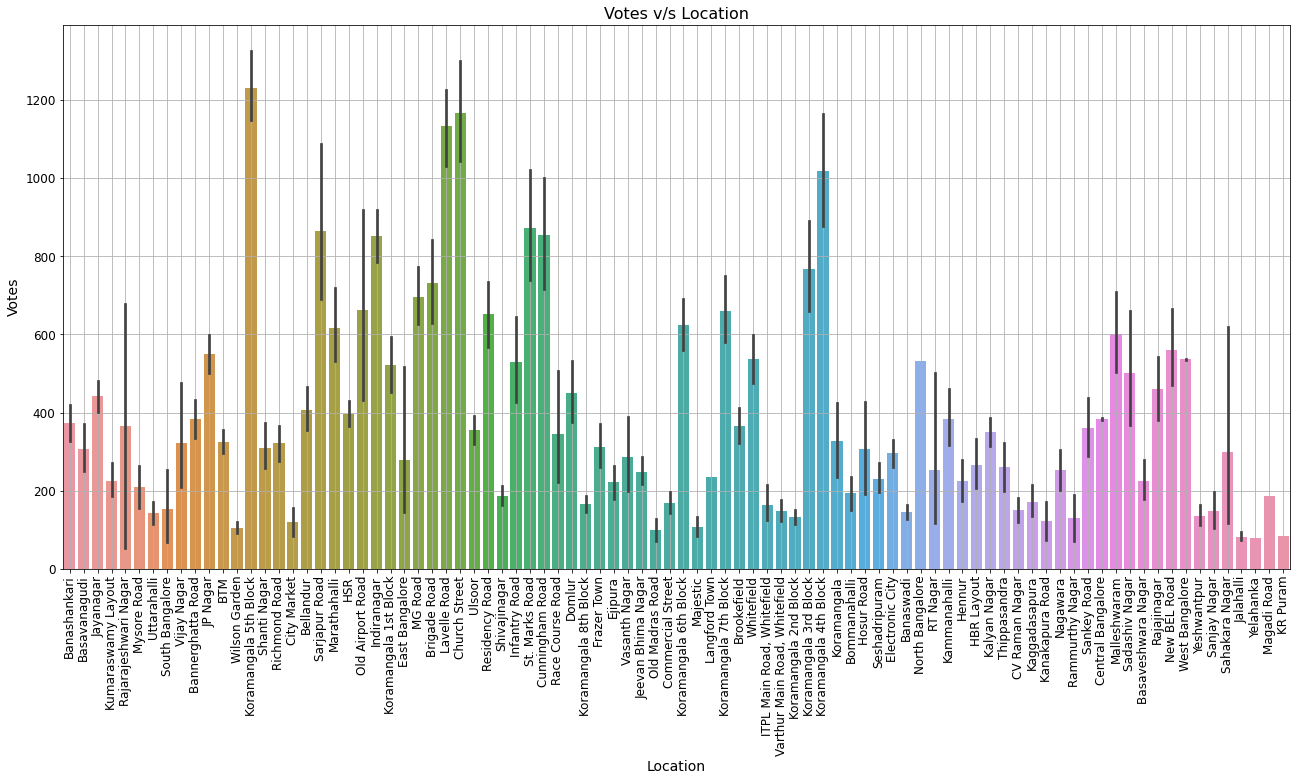

In [13]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(22, 10))

# Creating a barplot for country vs revenue
sns.barplot(y=df['votes'].sort_values(), x=df['location'][10:])

# Adding Cosmetics
plt.xlabel(xlabel='Location', fontsize=14)
plt.ylabel(ylabel='Votes', fontsize=14)
plt.title(label='Votes v/s Location', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)

# Display the plot
plt.show()

<AxesSubplot:xlabel='location'>

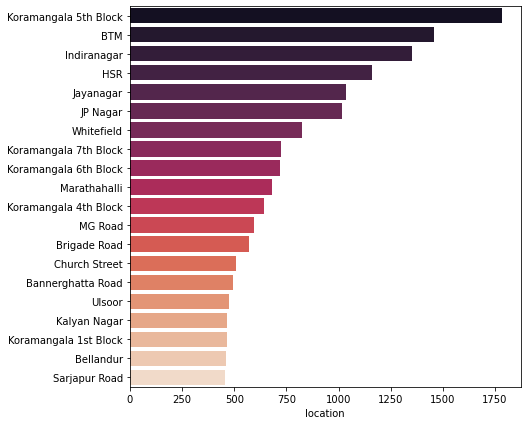

In [14]:
plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")

<AxesSubplot:ylabel='online_order'>

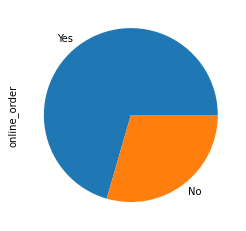

In [15]:
df['online_order'].value_counts().plot.pie()

In [16]:
df['book_table'].value_counts().plot

In [ ]:
df.columns

<AxesSubplot:>

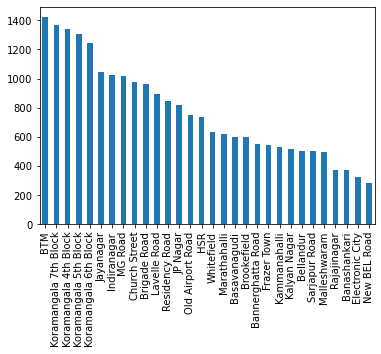

In [17]:
df['listed_in(city)'].value_counts().plot.bar()

<AxesSubplot:>

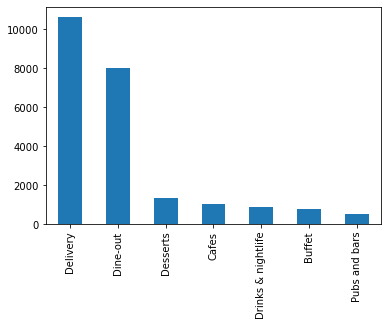

In [18]:
df['listed_in(type)'].value_counts().plot.bar()

In [19]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

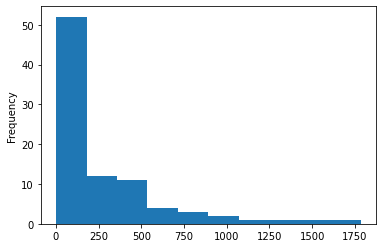

In [20]:
df['location'].value_counts().plot.hist()

In [21]:
df['cuisines'].value_counts()

North Indian                                                  1144
North Indian, Chinese                                          777
South Indian                                                   359
Cafe                                                           273
South Indian, North Indian, Chinese                            233
                                                              ... 
Cafe, Salad, Healthy Food, Mexican                               1
Biryani, Chettinad, Chinese                                      1
North Indian, South Indian, Chinese, Desserts, Street Food       1
North Indian, Chinese, South Indian, Juices                      1
Thai, Chinese, Momos                                             1
Name: cuisines, Length: 1687, dtype: int64

In [22]:
df['name'].value_counts()[:10]

Onesta                    85
Empire Restaurant         69
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Name: name, dtype: int64

Text(0.5, 0, 'Number of outlets')

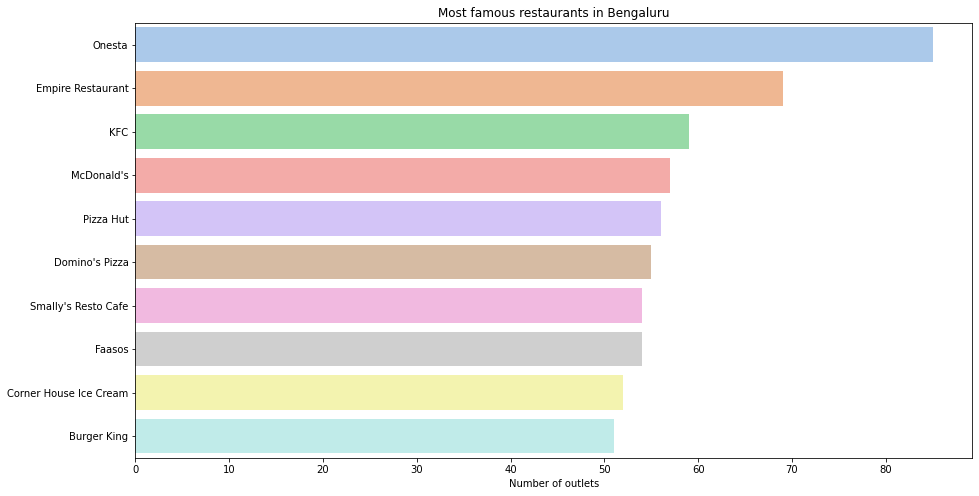

In [23]:
plt.figure(figsize = (15,8))
chains = df['name'].value_counts()[:10]
sns.barplot(x = chains, y = chains.index, palette = 'pastel')
plt.title("Most famous restaurants in Bengaluru")
plt.xlabel("Number of outlets")

In [ ]:
#**How many of the restuarants do not accept online orders?**

In [24]:
order = df['online_order'].value_counts()

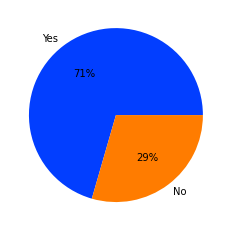

In [25]:
palette_color = sns.color_palette('bright')
plt.pie(order, labels= order.index, colors=palette_color, autopct='%.0f%%')
plt.show()

In [ ]:
#Insights: Approx 30 percent of the total restaurants in Bengaluru do not accept online orders. 
# This may be due to insuffient revenue generated by these restaurants due to which they are unable to pay the commission
# to zomato for its online services. Zomato may want to give them some concession or incentives to encourage these restaurants
# to have online ordering from zomato.

In [ ]:
#[What is the ratio b/w restaurants that provide and do not provide table booking ?]()<a id="25"></a> <br>

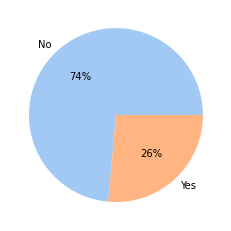

In [26]:
booking = df['book_table'].value_counts()
plt.pie(booking, labels = booking.index, colors = sns.color_palette('pastel'), autopct = '%.0f%%')
plt.show()

In [ ]:
#Insights: Approx 2/3rd of the total restaurants in Bengaluru do not accept table bookings. 
# This may be due to regular cancellations and no show ups or maybe they dont have enough customers.
# 

<AxesSubplot:xlabel='rate', ylabel='Density'>

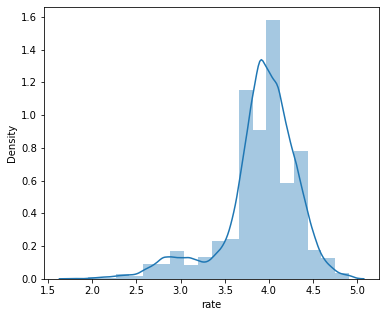

In [27]:
plt.figure(figsize=(6,5))
rating=df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3) else np.nan).dropna()
sns.distplot(rating,bins=20)

In [28]:
#Is there any difference b/w votes of restaurants accepting and not accepting online orders?

In [ ]:
df.columns

In [ ]:
df['online_order'].value_counts().plot.pie(colors = sns.color_palette('pastel'),autopct = '%0.2f%%'),

In [ ]:
df['votes'].value_counts()[:20].plot.bar()

In [ ]:
votes_yes=df[df['online_order']=="Yes"]['votes']
trace0=go.Box(y=votes_yes,name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))

votes_no=df[df['online_order']=="No"]['votes']
trace1=go.Box(y=votes_no,name="Not accepting online orders",
              marker = dict(
        color = 'rgb(0, 128, 128)',
    ))

layout = go.Layout(
    title = "Box Plots of votes",width=800,height=500
)

data=[trace0,trace1]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
df[df['online_order']=='Yes']['votes']

In [ ]:
df[df['online_order']=='Yes'].plot.scatter(x='online_order', y='votes')
df[df['online_order']=='No'].plot.scatter(x='online_order', y='votes')

In [ ]:
df[df['online_order']== 'Yes'].plot.line()
df[df['online_order']== 'No'].plot.line()

In [ ]:
df.columns

In [ ]:
df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3) else np.nan).dropna().plot.hist()

In [ ]:
cost_dist=df[['rate','approx_cost(for two people)','online_order']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=cost_dist)
plt.show()

In [ ]:
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(cost_dist['approx_cost(for two people)'])
plt.show()

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(10,7))
rest = df['rest_type'].value_counts()[:7]
plt.pie(rest,autopct='%.0f%%',labels = rest.index)
plt.show()

In [ ]:
#Majority of Bangaloreans prefer quick bites due to their busy schedules and sporadic working shifts.

In [ ]:
#Cost Factor

In [ ]:
df.columns

In [ ]:
plt.figure(figsize = (10,7))
cost = df['approx_cost(for two people)'].value_counts()
sns.boxplot(x=cost)

In [ ]:
trace0=go.Box(y=df['approx_cost(for two people)'],name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=500,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
#Finding Best budget Restaurants in any location

In [ ]:
cost_dist=df[['rate','approx_cost(for two people)','location','name','rest_type']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)

In [ ]:
cost_dist['approx_cost(for two people)'].astype(str)

In [ ]:
cost_dist['approx_cost(for two people)']= cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

In [ ]:
count = df['listed_in(city)'].value_counts()

In [ ]:
cafe=df[df['rest_type']=='Cafe'][:3]
cafe

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df['votes']

In [ ]:
profile = ProfileReport(data = df)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

In [ ]:
df.profile_report(style={‘full_width’:True})

In [ ]:
df.describe()

In [31]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

MemoryError: Unable to allocate 67.0 GiB for an array with shape (13998,) and data type <U1284117

In [30]:
df['cuisines'].value_counts()

North Indian                                                  1144
North Indian, Chinese                                          777
South Indian                                                   359
Cafe                                                           273
South Indian, North Indian, Chinese                            233
                                                              ... 
Cafe, Salad, Healthy Food, Mexican                               1
Biryani, Chettinad, Chinese                                      1
North Indian, South Indian, Chinese, Desserts, Street Food       1
North Indian, Chinese, South Indian, Juices                      1
Thai, Chinese, Momos                                             1
Name: cuisines, Length: 1687, dtype: int64

Text(0.5, 0, 'Number of restaurants')

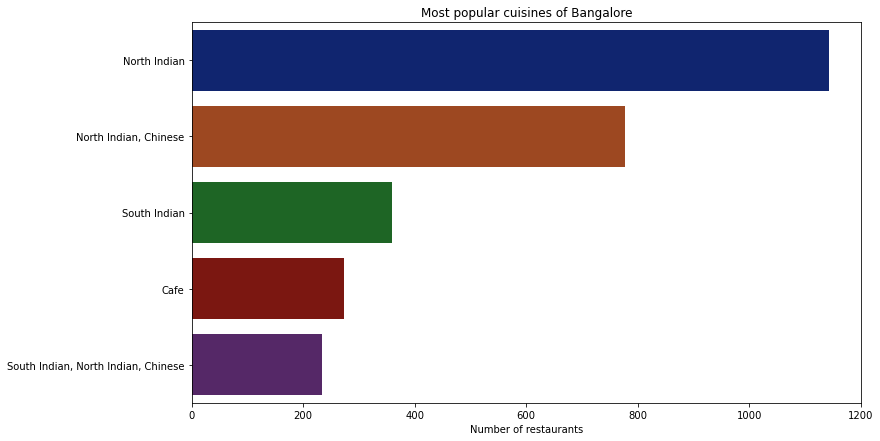

In [29]:
plt.figure(figsize = (12,7))
cuisines = df['cuisines'].value_counts()[:5]
sns.barplot(x = cuisines, y = cuisines.index, palette = 'dark')
plt.title("Most popular cuisines of Bangalore")
plt.xlabel("Number of restaurants")